In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

## Data preparation

 As the Kaggle entry states, the folder 'dataset2-master' contains 2,500 augmented images with 4 additional subtype labels (JPEG + CSV).

In [2]:
# Make path variable and determine desired image dimensions
# test_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TEST/'
# train_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TRAIN/'

test_path = r'C:\\Users\\Martin Schepers\\Documents\\dataset2-master\\dataset2-master\\images\\TEST\\'
train_path = r'C:\\Users\\Martin Schepers\\Documents\\dataset2-master\\dataset2-master\\images\\TRAIN\\'


train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory=train_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory=test_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [3]:
for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype)
    print(y_train.shape, y_train.dtype)
    break

(20, 120, 160, 3) float32
(20, 4) float32


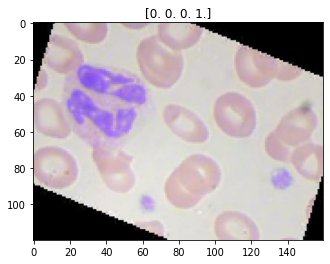

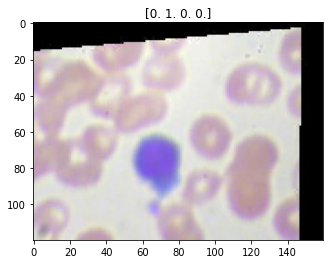

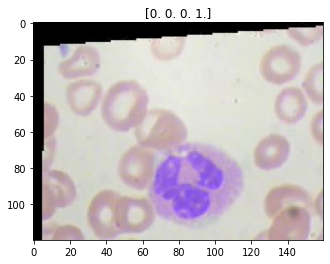

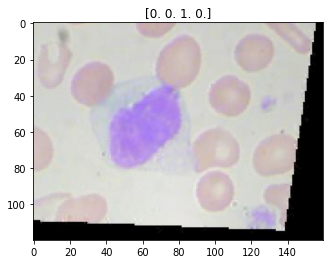

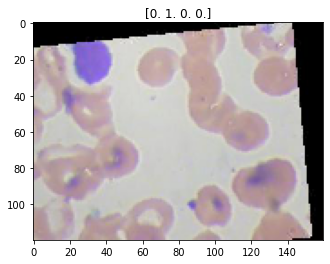

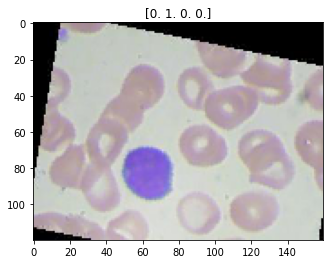

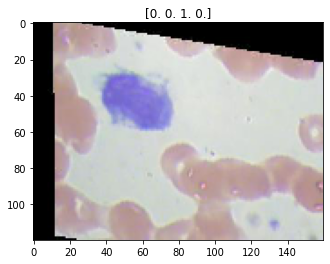

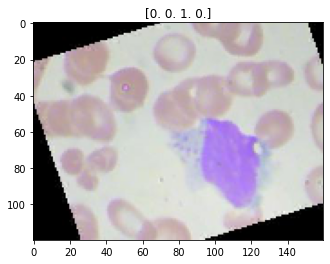

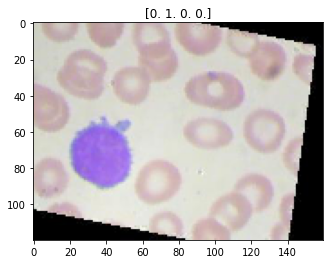

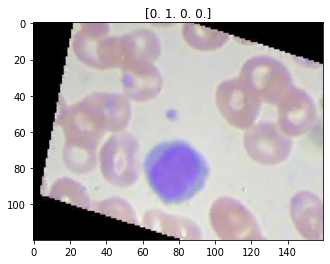

In [4]:
import matplotlib.pyplot as plt
for i in range(0, 10):
    plt.imshow(x_train[i])
    plt.title(str(y_train[i]))
    plt.show()

## Deep learning model creation

In [5]:
#### Change to leaky relu! So far best
#### Perhaps higher dropout?

celclass = keras.models.Sequential()
celclass.add(keras.layers.InputLayer(input_shape=(120, 160, 3)))
# First convolutional layer
celclass.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())
celclass.add(keras.layers.Dropout(0.3))

# Second convolutional layer
celclass.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())
# celclass.add(keras.layers.Dropout(0.3))

# Third convolutional layer
celclass.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())

# Dense layer
celclass.add(keras.layers.Flatten())
celclass.add(keras.layers.Dense(units=64, activation='relu'))

# Output layer
celclass.add(keras.layers.Dense(units=4, activation='softmax'))

celclass.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 79, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 79, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 36, 128)       7

In [6]:
celclass.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.CategoricalAccuracy()
)

In [ ]:
# history = celclass.fit(train_generator, validation_data=test_generator, epochs=30)

history = celclass.fit_generator(generator=train_generator,
                                 epochs=30,
                                 steps_per_epoch=300,
                                 validation_data=test_generator,
                                 validation_steps=50
                                )

history.history.keys()

Epoch 1/30


C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_12476/3336117131.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = celclass.fit_generator(generator=train_generator,


300/300 [==============================] - 60s 200ms/step - loss: 1.4017 - categorical_accuracy: 0.2380 - val_loss: 1.3864 - val_categorical_accuracy: 0.2320
Epoch 2/30
300/300 [==============================] - 58s 194ms/step - loss: 1.3866 - categorical_accuracy: 0.2520 - val_loss: 1.3863 - val_categorical_accuracy: 0.2630
Epoch 3/30
300/300 [==============================] - 58s 195ms/step - loss: 1.3865 - categorical_accuracy: 0.2421 - val_loss: 1.3862 - val_categorical_accuracy: 0.2620
Epoch 4/30
300/300 [==============================] - 59s 195ms/step - loss: 1.3868 - categorical_accuracy: 0.2481 - val_loss: 1.3862 - val_categorical_accuracy: 0.2570
Epoch 5/30
300/300 [==============================] - 58s 195ms/step - loss: 1.3865 - categorical_accuracy: 0.2541 - val_loss: 1.3860 - val_categorical_accuracy: 0.2620
Epoch 6/30
300/300 [==============================] - 59s 195ms/step - loss: 1.3866 - categorical_accuracy: 0.2476 - val_loss: 1.3866 - val_categorical_accuracy: 0.26

In [ ]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()